# Photic Zone: CTD

The photic zone notebooks concern sensor data from the surface to about 200 meters depth: The 'photic zone' is regularly illuminated by sunlight.

Data are first taken from the Regional Cabled Array shallow profilers and platforms. A word of explanation here: The
profilers rise and then fall over the course of about 80 minutes, nine times per day, from a depth of 200 meters
to within about 10 meters of the surface. As the ascend and descend they record data. The resting location in
between these excursions is a platform 200 meters below the surface that is anchored to the see floor. The platform
also carries sensors that measure basic ocean water properties.


<BR>
<img src="./images/vessels/revelle.jpg" style="float: left;" alt="ship and iceberg photo" width="900"/>
<div style="clear: left"><BR>


Research ship Revelle in the southern ocean: 100 meters in length. 
Ninety percent of the iceberg is beneath the surface. 


More on the Regional Cabled Array oceanography program [here](https://interactiveoceans.washington.edu).
    
    
### Study site locations
    

We begin with three sites in the northeast Pacific: 
    

```
Site name               Lat               Lon
------------------      ---               ---
Oregon Offshore         44.37415          -124.95648
Oregon Slope Base       44.52897          -125.38966 
Axial Base              45.83049          -129.75326
```   

In [3]:
import os, sys, time, glob, warnings
from IPython.display import clear_output             # use inside loop with clear_output(wait = True) followed by print(i)
warnings.filterwarnings('ignore')
this_dir = os.getcwd()

from matplotlib import pyplot as plt
from matplotlib import colors as mplcolors
import numpy as np, pandas as pd, xarray as xr
from numpy import datetime64 as dt64, timedelta64 as td64


print('\nJupyter Notebook running Python {}'.format(sys.version_info[0]))


Jupyter Notebook running Python 3


In [13]:
# convenience functions abbreviating 'datetime64' and so on
def doy(theDatetime): return 1 + int((theDatetime - dt64(str(theDatetime)[0:4] + '-01-01')) / td64(1, 'D'))
def dt64_from_doy(year, doy): return dt64(str(year) + '-01-01') + td64(doy-1, 'D')
def day_of_month_to_string(d): return str(d) if d > 9 else '0' + str(d)

## CTD including Dissolved Oxygen

In [19]:
ctd_source = '/data/rca/simpler/'
ctd_data = 'osb_sp_ctdpf_2019.nc'
ds_CTD = xr.open_dataset(ctd_source + ctd_data)
ds_CTD

<xarray.Dataset>
Dimensions:                     (time: 22729307)
Coordinates:
  * time                        (time) datetime64[ns] 2019-01-01T00:00:00.743...
    seawater_pressure           (time) float64 ...
Data variables:
    seawater_temperature        (time) float64 ...
    practical_salinity          (time) float64 ...
    corrected_dissolved_oxygen  (time) float64 ...
    density                     (time) float64 ...
Attributes:
    node:                SF01A
    id:                  RS01SBPS-SF01A-2A-CTDPFA102-streamed-ctdpf_sbe43_sample
    geospatial_lat_min:  44.52897
    geospatial_lon_min:  -125.38966

...


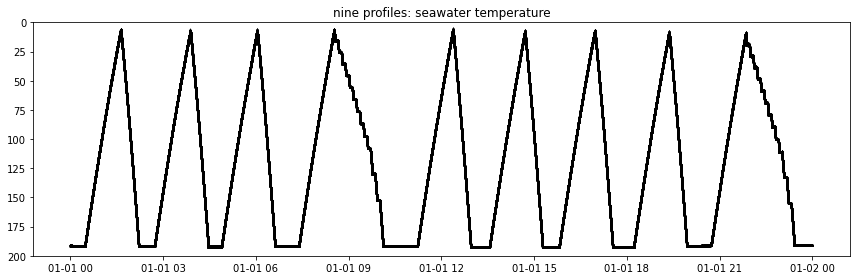

In [33]:
ds_CTD_time_slice = ds_CTD.sel(time=slice(dt64('2019-01-01'), dt64('2019-01-02')))    # one day
fig, axs = plt.subplots(figsize=(12,4), tight_layout=True)
axs.scatter(ds_CTD_time_slice.time, ds_CTD_time_slice.seawater_pressure, marker='^', s = 1., color='k')
axs.set(ylim = (200., 0.), title='nine profiles: seawater temperature')
print('...')

In [50]:
# to do: 
# Treat profiles as monolithic in time (philosophical)
# stack three charts into 1
# set up running averages
# smear / chooser
# extend the use of time delimeters across everything that follows
# include the axs.set() usage down the line
# get rid of the print...s and the other junk print
# look at the nitrate doy usage and maybe shift to that

day_of_month_start = '08'
day_of_month_end = '11'
time_slice_start = '2019-01-' + day_of_month_start
time_slice_end = '2019-01-' + day_of_month_end


[(7.0, 13.0),
 (200.0, 0.0),
 Text(0.5, 1.0, 'several profiles: seawater temperature')]

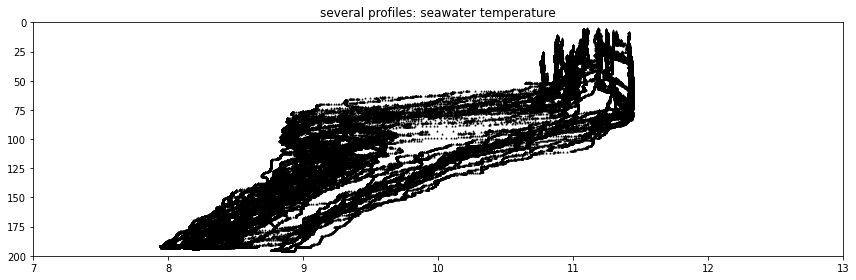

In [51]:
temperature_upper_bound = 13.
temperature_lower_bound = 7.
ds_CTD_time_slice = ds_CTD.sel(time=slice(dt64(time_slice_start), dt64(time_slice_end)))    # one day
fig, axs = plt.subplots(figsize=(12,4), tight_layout=True)
axs.scatter(ds_CTD_time_slice.seawater_temperature, ds_CTD_time_slice.seawater_pressure, marker='^', s = 1., color='k')
axs.set(xlim = (temperature_lower_bound, temperature_upper_bound), \
        ylim = (200., 0.), title='several profiles: seawater temperature')

...


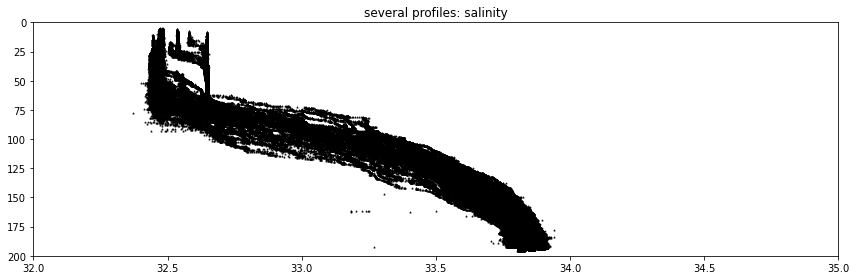

In [44]:
salinity_upper_bound = 35.
salinity_lower_bound = 32.
ds_CTD_time_slice = ds_CTD.sel(time=slice(dt64(time_slice_start), dt64(time_slice_end)))    # one day
fig, axs = plt.subplots(figsize=(12,4), tight_layout=True)
axs.scatter(ds_CTD_time_slice.practical_salinity, \
            ds_CTD_time_slice.seawater_pressure, marker='^', s = 1., color='k')
axs.set(xlim = (salinity_lower_bound, salinity_upper_bound), \
        ylim = (200., 0.), title='several profiles: salinity')
print('...')

...


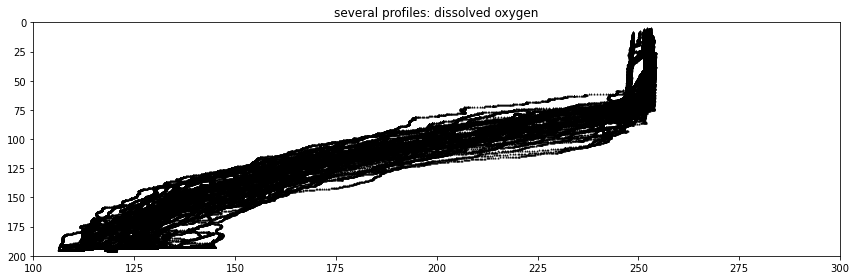

In [45]:
dissolved_oxygen_upper_bound = 300
dissolved_oxygen_lower_bound = 100
ds_CTD_time_slice = ds_CTD.sel(time=slice(dt64(time_slice_start), dt64(time_slice_end)))    # one day
fig, axs = plt.subplots(figsize=(12,4), tight_layout=True)
axs.scatter(ds_CTD_time_slice.corrected_dissolved_oxygen, \
            ds_CTD_time_slice.seawater_pressure, marker='^', s = 1., color='k')
axs.set(xlim = (dissolved_oxygen_lower_bound, dissolved_oxygen_upper_bound), \
        ylim = (200., 0.), title='several profiles: dissolved oxygen')
print('...')

#### more to do

* scan depth for profile start and stop times for the entire range

skeleton code

```
profiles = []
time_marker = dt64('2019-01-01T00:00:00.00')
time_delta = td64(20 minutes)
end_time = ds_ctdpf.time[-1]
while time_marker < end_time:
    note the current depth and time
    next_time = time_marker + time_delta
    is the depth considerably less compared to a threshold?
        iterate a bit: three possibilities: The ascent started before time_marker, between, or after end_time
        Now search forward to the apex...
            Now search forward to the return
    next while
```

## Nitrate

In [4]:
nitrate_source = '/data1/nutnr/'
nitrate_data_midnight = 'nc_midn_2019_01.nc'
nitrate_data_noon     = 'nc_noon_2019_01.nc'

In [5]:
ds_nitrate_midn = xr.load_dataset(nitrate_source + nitrate_data_midnight)
ds_nitrate_noon = xr.load_dataset(nitrate_source + nitrate_data_noon)

In [6]:
ds_nitrate_midn

<xarray.Dataset>
Dimensions:                (doy: 30, int_ctd_pressure_bins: 800)
Coordinates:
  * int_ctd_pressure_bins  (int_ctd_pressure_bins) float64 0.125 0.375 ... 199.9
  * doy                    (doy) int64 1 2 3 4 5 6 7 8 ... 25 26 27 28 29 30 31
Data variables:
    nitrate_concentration  (int_ctd_pressure_bins, doy) float32 nan nan ... nan

...


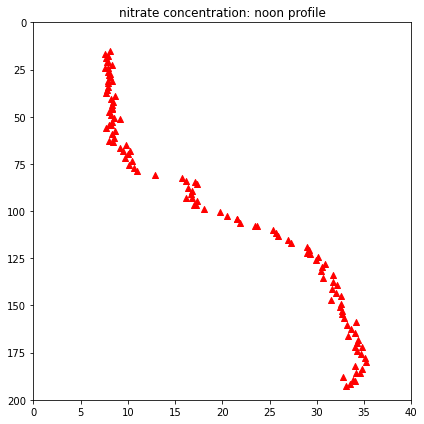

In [8]:
# to do: Create a staggered sequence, parallel midnight and noon rows

nitrate_upper_bound = 40.
fig, axs = plt.subplots(figsize=(6,6), tight_layout=True)
axs.scatter(ds_nitrate_noon.nitrate_concentration.sel(doy=8), \
            ds_nitrate_noon.int_ctd_pressure_bins,  marker='^', color='r') 
axs.set(xlim = (.0, nitrate_upper_bound), ylim = (200., 0.), title='nitrate concentration: noon profile')
print('...')

## pH

In [9]:
pH_source = '/data/rca/simpler/'
pH_data = 'osb_sp_phsen_2019.nc'
ds_pH = xr.open_dataset(pH_source + pH_data)

...


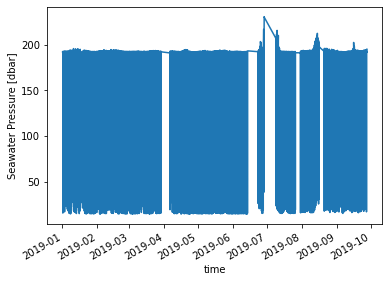

In [11]:
ds_pH.int_ctd_pressure.plot()       # sanity check: Is this profile data as we expect? 
print('...')

...


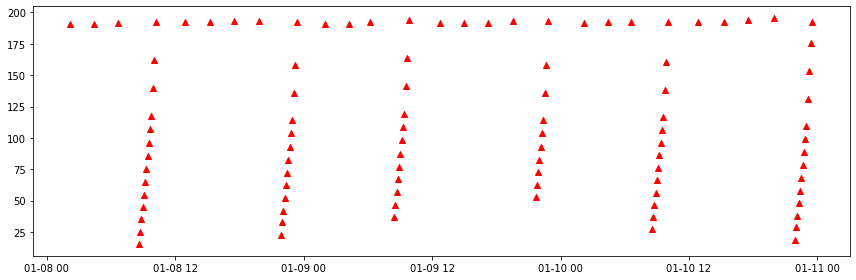

In [52]:
ds_pH_time_slice = ds_pH.sel(time=slice(dt64(time_slice_start), dt64(time_slice_end))) # 2 days
fig, axs = plt.subplots(figsize=(12,4), tight_layout=True)
axs.scatter(ds_pH_time_slice.time, ds_pH_time_slice.int_ctd_pressure, marker='^', color='r')
print('...')

In [16]:
# to do: Actually plot data how bout!

## Spectral Irradiance

In [47]:
spectral_irradiance_source = '/data/rca/simpler/'
spectral_irradiance_data = 'osb_sp_spkir_2019.nc'
ds_spectral_irradiance = xr.open_dataset(spectral_irradiance_source + spectral_irradiance_data)
ds_spectral_irradiance

<xarray.Dataset>
Dimensions:                   (spectra: 7, time: 90777333)
Coordinates:
  * time                      (time) datetime64[ns] 2019-01-01T00:00:00.21067...
    int_ctd_pressure          (time) float64 ...
Dimensions without coordinates: spectra
Data variables:
    spkir_downwelling_vector  (time, spectra) float64 ...
Attributes:
    node:                SF01A
    id:                  RS01SBPS-SF01A-3D-SPKIRA101-streamed-spkir_data_record
    geospatial_lat_min:  44.52897
    geospatial_lon_min:  -125.38966

...


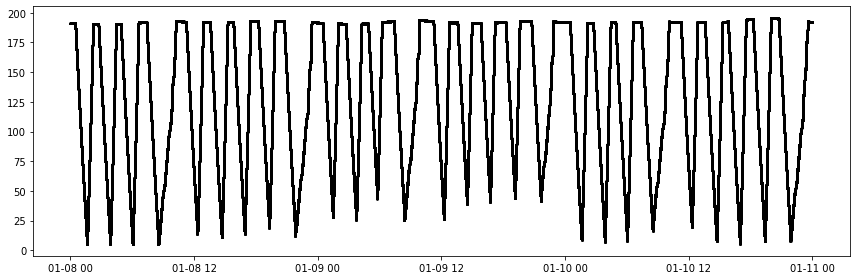

In [49]:
ds_spectral_irradiance_time_slice = ds_spectral_irradiance.sel(time = \
    slice(dt64(time_slice_start), dt64(time_slice_end)))
fig, axs = plt.subplots(figsize=(12,4), tight_layout=True)
axs.scatter(ds_spectral_irradiance_time_slice.time, \
            ds_spectral_irradiance_time_slice.int_ctd_pressure, marker='^', s = 1., color='k')
print('...')

## Spectral Irradiance (`spkir`)


* 9 months continuous operation at about 4 samples per second gives 91 million samples
* DataSet includes `int_ctd_pressure` and `time` Coordinates; Dimensions are `spectra` (0--7) and `time`
* Data Variables: Only one, `spkir_downwelling_vector` which is (`time` x `spectra`)
* Attributes include
    * `node : SF01A`
    * `id : RS01SBPS-SF01A-3D-SPKIRA101-streamed-spkir_data_record`
    * `geospatial_lat_min : 44.52897`
    * `geospatial_lon_min :-125.38966`



From [Interactive Oceans](https://interactiveoceans.washington.edu/instruments/spectral-irradiance-sensor/): 



> The Spectral Irradiance sensor (Satlantic OCR-507 multispectral radiometer) measures the amount of downwelling radiation (light energy) 
per unit area that reaches a surface. Radiation is measured and reported separately for a series of seven wavelength bands (412, 443, 
490, 510, 555, 620, and 683nm), each between 10-20 nm wide. These measurements depend on the natural illumination conditions of sunlight 
and measure apparent optical properties. These measurements also are used as proxy measurements of important biogeochemical variables 
in the ocean.
>
>Spectral Irradiance sensors are installed on the  Science Pods on the Shallow Profiler Moorings at Axial Base (SF01A), Slope Base (SF01A),
and at the Endurance Array Offshore (SF01B) sites. Instruments on the Cabled Array are provided by Satlantic – OCR-507. The profiling science 
pods have made >30,000 profiles since 2015. They are recovered and replaced annually using a remotely operated vehicle.




As it stands after a cursory set-up the plots show an overlay of about two and one half profile runs.


* look up the spectra specs
* Any SME? What is spectral irradiance anyways? 

In [ ]:
# WARNING Have not touched this yet

%%time
ds = ds_spkir.sel(time=slice(dt64('2019-01-01T00:00'), dt64('2019-01-01T06:00:00')))     # first 6 hours of 2019: 86,000 values
da_depth = ds.int_ctd_pressure.resample(time='1Min').mean()
dsbar = ds.resample(time='1Min').mean()
dsstd = ds.resample(time='1Min').std()                          # this takes about 14 minutes: Inefficient indexing across the spectra?
# dsbar.spkir_downwelling_vector.isel(spectra=3).plot()

In [ ]:
plot_base_dimension = 4
indices = [0, 1, 2, 3, 4, 5, 6]
n_indices = len(indices)
da_si, da_st = [], []                # averaged data (si = spectral irradiance) and corresponding standard deviations

for idx in indices: 
    da_si.append(dsbar.spkir_downwelling_vector.isel(spectra=idx))
    da_st.append(dsstd.spkir_downwelling_vector.isel(spectra=idx))

fig, axs = plt.subplots(n_indices, 2, figsize=(4*plot_base_dimension, plot_base_dimension*n_indices), sharey=True, tight_layout=True)

axs[0][0].scatter(da_si[0], da_depth, marker=',', s=1., color='k'); axs[0][0].set(ylim = (200., 0.), xlim = (-.03, .03), title='spectral irradiance averaged')
axs[0][1].scatter(da_st[0], da_depth, marker=',', s=1., color='r'); axs[0][1].set(ylim = (200., 0.), xlim = (0., .002), title='standard deviation')

for i in range(1, n_indices):
    axs[i][0].scatter(da_si[i], da_depth, marker=',', s=1., color='k'); axs[i][0].set(ylim = (200., 0.), xlim = (-.03, .03))
    axs[i][1].scatter(da_st[i], da_depth, marker=',', s=1., color='r'); axs[i][1].set(ylim = (200., 0.), xlim = (0., .002))



## Fluorometer

* 'flort'
* Shallow Profiler fluorometers are 3-channel: chlorophyll, cdom and scattering
* Deep profilers are 2-channel
* operate continuously

In [61]:
fluorometer_source = '/data/rca/simpler/'
fluorometer_data = 'osb_sp_flort_2019.nc'
ds_Fluorometer = xr.open_dataset(fluorometer_source + fluorometer_data)
ds_Fluorometer

<xarray.Dataset>
Dimensions:                              (time: 18932845)
Coordinates:
  * time                                 (time) datetime64[ns] 2019-01-01T00:...
    int_ctd_pressure                     (time) float64 ...
Data variables:
    fluorometric_chlorophyll_a           (time) float64 ...
    fluorometric_cdom                    (time) float64 ...
    total_volume_scattering_coefficient  (time) float64 ...
    seawater_scattering_coefficient      (time) float64 ...
    optical_backscatter                  (time) float64 ...
Attributes:
    node:                SF01A
    id:                  RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_re...
    geospatial_lat_min:  44.52897
    geospatial_lon_min:  -125.38966

[(-0.2, 1.4), (200.0, 0.0), Text(0.5, 1.0, 'multiple profiles: fluorometer')]

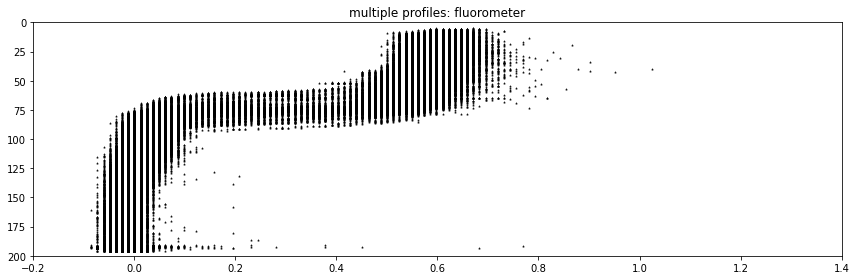

In [68]:
fluorometer_lower_bound = -.2
fluorometer_upper_bound = 1.4
ds_Fluorometer_time_slice = ds_Fluorometer.sel(time=slice(dt64(time_slice_start), dt64(time_slice_end)))
fig, axs = plt.subplots(figsize=(12,4), tight_layout=True)
axs.scatter(ds_Fluorometer_time_slice.fluorometric_chlorophyll_a, \
            ds_Fluorometer_time_slice.int_ctd_pressure, \
            marker='^', s = 1., color='k')
axs.set(xlim = (fluorometer_lower_bound, fluorometer_upper_bound), \
        ylim = (200., 0.), title='multiple profiles: fluorometer chlorophyll')

[(0.0, 3.5),
 (200.0, 0.0),
 Text(0.5, 1.0, 'multiple profiles: fluorometer CDOM')]

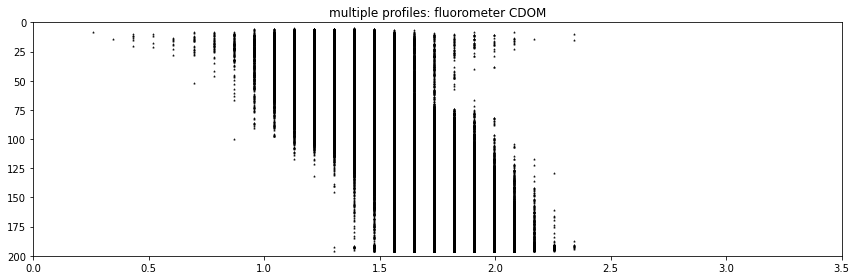

In [71]:
fluorometer_lower_bound = 0.
fluorometer_upper_bound = 3.5
ds_Fluorometer_time_slice = ds_Fluorometer.sel(time=slice(dt64(time_slice_start), dt64(time_slice_end)))
fig, axs = plt.subplots(figsize=(12,4), tight_layout=True)
axs.scatter(ds_Fluorometer_time_slice.fluorometric_cdom, \
            ds_Fluorometer_time_slice.int_ctd_pressure, \
            marker='^', s = 1., color='k')
axs.set(xlim = (fluorometer_lower_bound, fluorometer_upper_bound), \
        ylim = (200., 0.), title='multiple profiles: fluorometer CDOM')

[(0.0, 0.0007),
 (200.0, 0.0),
 Text(0.5, 1.0, 'multiple profiles: fluorometer volume scattering')]

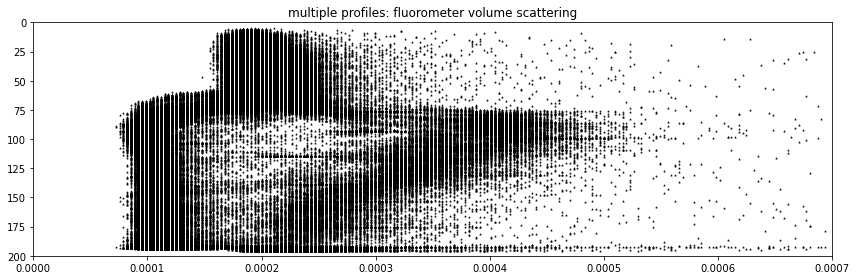

In [73]:
fluorometer_lower_bound = 0.
fluorometer_upper_bound = 0.0007
ds_Fluorometer_time_slice = ds_Fluorometer.sel(time=slice(dt64(time_slice_start), dt64(time_slice_end)))
fig, axs = plt.subplots(figsize=(12,4), tight_layout=True)
axs.scatter(ds_Fluorometer_time_slice.total_volume_scattering_coefficient, \
            ds_Fluorometer_time_slice.int_ctd_pressure, \
            marker='^', s = 1., color='k')
axs.set(xlim = (fluorometer_lower_bound, fluorometer_upper_bound), \
        ylim = (200., 0.), title='multiple profiles: fluorometer volume scattering')

In [ ]:
# run this to get a check of the units for chlorophyll 
ds_flort.fluorometric_chlorophyll_a.units
# p = rca_ds_chlor.fluorometric_chlorophyll_a.plot() is an option as well
# by assigning the plot to p we have future ornamentation options

## Photosynthetically Available Radiation

- Abbreviated PAR
- instrument string is *parad*
- Dubious claim: Can use to identify profile time ranges
    - Approximately from the PAR data and can be done very precisely using depth data
    - This suggests a derived dataset of profile start / peak / end times

In [57]:
par_source = '/data/rca/simpler/'
par_data = 'osb_sp_parad_2019.nc'
ds_PAR = xr.open_dataset(par_source + par_data)
ds_PAR

<xarray.Dataset>
Dimensions:            (time: 79928140)
Coordinates:
  * time               (time) datetime64[ns] 2019-01-01T00:00:00.191800832 .....
    int_ctd_pressure   (time) float64 ...
Data variables:
    par_counts_output  (time) float64 ...
Attributes:
    node:                SF01A
    id:                  RS01SBPS-SF01A-3C-PARADA101-streamed-parad_sa_sample
    geospatial_lat_min:  44.52897
    geospatial_lon_min:  -125.38966

...


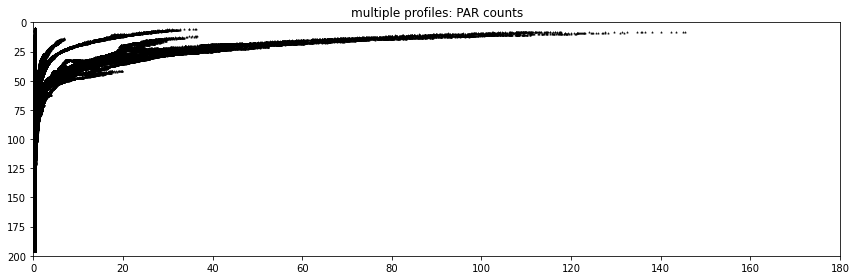

In [59]:
par_lower_bound = 0
par_upper_bound = 180
ds_PAR_time_slice = ds_PAR.sel(time=slice(dt64(time_slice_start), dt64(time_slice_end)))
fig, axs = plt.subplots(figsize=(12,4), tight_layout=True)
axs.scatter(ds_PAR_time_slice.par_counts_output, ds_PAR_time_slice.int_ctd_pressure, marker='^', s = 1., color='k')
axs.set(xlim = (par_lower_bound, par_upper_bound), ylim = (200., 0.), title='multiple profiles: PAR counts')
print('...')

In [ ]:
# artifact: Looking at PAR during shallow profiler rise/fall sequences

# various views of PAR during profiles based on time selection
t0, t1 = '2019-07-17T13', '2019-07-18T05'
t0, t1 = '2019-07-17T18:40', '2019-07-17T19:40'
t0, t1 = '2019-07-17T21', '2019-07-17T23:00'        # These are the nitrate profiles
t0, t1 = '2019-07-18T21', '2019-07-18T23:00'
t0, t1 = '2019-07-19T21', '2019-07-19T23:00'
t0, t1 = '2019-07-17T18:40', '2019-07-17T19:40'     # These are the profiles prior to nitrate
t0, t1 = '2019-07-18T18:40', '2019-07-18T19:40'
t0, t1 = '2019-07-19T18:40', '2019-07-19T19:40'
# da = ds_parad.sel(time=slice(t0, t1)).par_counts_output
# p=da.plot.line(marker='o', figsize = (14,8), markersize=1, yincrease = True)

# staged 'nitrate' profile compared with 'normal' profile
t0, t1 = '2019-07-19T20:30', '2019-07-19T23:50'               # USE THIS!! This is a good nitrate profile time bracket
t0, t1 = '2019-07-19T18:40', '2019-07-19T19:40'
# da = ds_parad.sel(time=slice(t0, t1)).int_ctd_pressure
# p=da.plot.line(marker='o', figsize = (14,8), markersize=1, yincrease = False)

## Process these relic notes...


## Resample and merge Datasets (mean and std)

### Section de-activated! Can skip ahead...

* We want to start with a copy of one `Dataset` (chosing `ctdpf`) as a starting point
* One open question: If we re-sample to (say) minutes: Will minutes with no data produce skips? Or nan values? 
* Another question is whether to `.merge()` the data and then `.resample()` it using `mean()`; or vice versa
  * For now I'll adopt vice versa

### Part 1: Create a copy of the CTD + Oxygen dataset

```
%%time

ds = ds_ctdpf.copy()
ds = ds.reset_coords('seawater_pressure')        # converts the coordinate to a data variable
```

### Part 2: Merge in the fluorescence data

```
%%time 

ds = ds.merge(ds_flort)
```

### Part 3: Downsample to one minute intervals (in motion that's about 4 meters)

```
%%time
ds_mean = ds.resample(time='1Min').mean()
```


### Part 4: Also get downsampled standard deviations

This sort of thing can be really slow and it probably helps to break out / streamline types first.


```
%%time

# expect 18 minutes
ds_std  = ds.resample(time='1Min').std()
```


### Part 5: Write the results


```
%%time

ds_mean.to_netcdf(data_dir + '/rca/simpler2/osb_sp_2019_ctdpf_flort_1Min_mean.nc')
ds_std.to_netcdf(data_dir + '/rca/simpler2/osb_sp_2019_ctdpf_flort_1Min_std.nc')
```

###  This approach does resampling prior to merge but was taking way too long for some reason...

```
%%time

ds = ds_flort.copy()
ds
ds = ds.reset_coords('seawater_pressure')        # converts the coordinate to a data variable
sys.stdout.write('\r'+'reset coordinates completed'
ds_mean = ds.resample(time='1Min').mean()
sys.stdout.write('\r'+'resample with mean() completed'
ds_std  = ds.resample(time='1Min').std()
sys.stdout.write('\r'+'resample with std() completed'
```

## Load R/M Dataset ctdpf + flort

Obviously these data are noisier towards the surface and some are ridiculously noisy. The next 
step needed is to filter on standard deviation, say using a threshold, to determine if throwing 
out a certain amount of the clutter leaves a signal of interest. The fluorometer is particularly
troublesome. 


Meanwhile it will be interesting to revisit curtain plots now that we are at one minute intervals. 


There is also the notion of reducing depth profiles to simple metrics.

... ideas ...


* profile start, peak, end times
* platform residence: start and end times (from profile times)


* (smoothed) chlorophyll derivative, curvature, rate of curvature
* Similarly salinity seems to go through a consistent double-zero in rate of curvature

* intersection depth as used in TDR; for example for temperature or salinity
  * extrapolate smoothed pressure by backing off the derivative change
  * extrapolate platform, intersect

* time of day / sun angle
* local time
* rate of ascent verify; I think 300 cm / minute